In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 코너 탐지
- Harris : 코너 탐지 기술
    - Parameters:	
        - src – Input single-channel 8-bit or floating-point image. ->np.float32
        - blockSize – Neighborhood size
        - ksize – Aperture parameter for the Sobel() operator.
        - k – Harris detector free parameter. See the formula below.

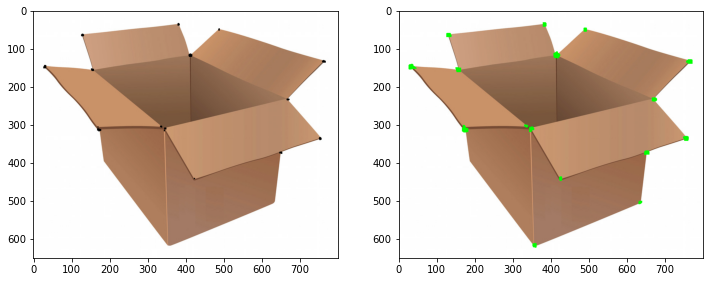

In [15]:
img = cv2.imread('img/box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) # harris를 위한 type change
# To detect Only sharp corner
dst = cv2.cornerHarris(gray,blockSize = 4,ksize = 5,k=0.04)
dst = cv2.dilate(dst,None) # 팽창

fig,axes = plt.subplots(1,2,figsize=(12,8))

# Threshold for and optimal value, it may vary depnding on the image
img[dst>0.01*dst.max()] = [0,0,0]
axes[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# To detect soft corner
dst = cv2.cornerHarris(gray,blockSize=10,ksize=5,k=0.04) # block size를 통해 soft , sharp 조절
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()] = [0,255,0]
axes[1].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# cv2.waitKey()
# cv2.destroyAllWindows()

- Shi-Tomasi 탐지
    - goodFeautrestoTrack:
        - qualityLevel = 일반적으로 0.01~0.1 사이, 최소 품질 설정
        - maxCorners = 반환할 코너의 개수
        - minDistance = 최소 근접 거리. 최소 근접거리 이상값만 추출

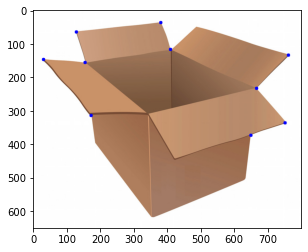

In [29]:
img = cv2.imread('img/box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,maxCorners = 10, qualityLevel = 0.05,minDistance=25)
corners = np.float32(corners)

for item in corners:
    x,y = item[0]
    cv2.circle(img,(x,y),5,255,-1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# SIFT
- 잠정적인 키포인트를 구부낳기 위해 영상을 다운샘플링하고 가우시안 차를 취하여 피라미드를 만든다.
    즉, 이는 각 레벨에서 가우시안 필터를 수행하고 피라미드에서 연속 레벨을 만들기 위해 차이를 취한다는 것이다.
    현재 화소가 키포인트인가를 알기 위해 피라미드의 이웃 레벨의 같은 위치에서의 화소들과 이웃 화소들을 살펴본다.
    만약 그것이 최대이면 현재 화소는 키포인트로 선택된다. 키포인트들을 크기 불변으로 유지해야한다.
    
    키포인트를 구분하면 각 키포인트에 방향이 할당된다. 각 키포인트 주위를 취해 Gradient 크기와 방향을 계산한다.
    이렇게 하면 영상이 회전되어도 키포인트를 같은 포인트에 매칭할 수 있다.

In [32]:
cv2.__version__

'4.4.0'

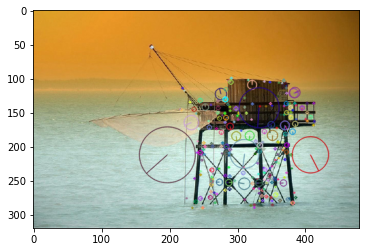

In [36]:
input_image = cv2.imread('img/fishing_house.jpg')
gray_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create() 
keypoints = sift.detect(gray_image,None) # sift로 keypoint 찾기
cv2.drawKeypoints(input_image,keypoints,input_image,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('sift  features',input_image)
plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
cv2.waitKey()
cv2.destroyAllWindows()

# SURF
- SIFT는 계산이 많아 시간이 느리고 실시간 구현이 힘듦
- SURF는 SIFT 보다 빠른 장점

In [48]:
input_image = cv2.imread('img/fishing_house.jpg') 
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) 
 

surf = cv2.SURF()

# This threshold controls the number of keypoints 
surf.setHessianThreshold(15000) 

keypoints, descriptors = surf.detectAndCompute(gray_image, None) 

cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
 
cv2.imshow('SURF features', input_image) 
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'SURF'

In [ ]:
# 패키지 없음

# FAST(Features from Accelerated Segment Test

Number of keypoints with non max suppression:  847


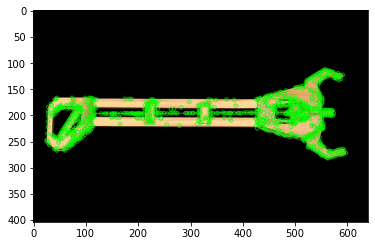

In [5]:
input_image = cv2.imread('img/tool.png') 
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) 

fast = cv2.FastFeatureDetector_create()
# Detect keypoints
keypoints = fast.detect(gray_image,None)
print("Number of keypoints with non max suppression: ",len(keypoints))

# Draw keypoints on top of the input image
img_keypoints_with_nonmax = input_image.copy()
cv2.drawKeypoints(input_image,keypoints,img_keypoints_with_nonmax,color=(0,255,0),\
                 flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('Fast keypoints - with non max suppression',img_keypoints_with_nonmax)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(False)
keypoints = fast.detect(gray_images,None)
img_keypoints_with_nonmax = input_image.copy()

print("Number of keypoints with non max suppression: ",len(keypoints))
'''
작성중
'''

plt.imshow(cv2.cvtColor(img_keypoints_with_nonmax,cv2.COLOR_BGR2RGB))
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()